# Report for Homework Excercise 1 - Ben-Jasper Kettlitz [E11215002]

First we introduce the torch package into our scope. We also set the random seed to a fixed value to ensure reproducibility.

In [23]:
import pandas as pd
import numpy as np

RANDOM_SEED = 1234
np.random.seed(RANDOM_SEED)

import matplotlib.pyplot as plt 


Next we will simply write two classes which are the formal representation of the perceptron w.r.t. the typical pytorch class layout.
For what the methods do refer to the class documentation

In [24]:
from typing import Union

class SinglePerceptron():
    def __init__(self):
        """A simple perceptron with 2 inputs and 1 output. Single hidden layer.
        
        Internal parameters:
        -   weights: np.array, weights for each input initalised to -1, 1
        -   bias: int, bias initalised to -1 the inital bias to the perceptron
        -   learning_rate: float, learning rate initalised to 0.2 in more complicated models this is a hyperparameter
            and describes the step size of the gradient descent
        -   activation_function: lambda function, initalised to a lambda function that returns 1 if the input is greater
            here this is the simple sign function with a threshold of 0, binary values -1 or 1
        
        """
        self.activation_function = lambda x: 1 if x >= 0 else -1
        self.bias = -1
        self.weights = np.array([-1.0, 1.0])
        self.learning_rate = 0.2

    def predict(self, x: Union[np.array, float]) -> Union[np.array, float]:
        """Predicts the output of the perceptron given an input x.

        Args:
            x (Union[np.array, float]): Input to the layer. Can be a single value or an array of values.

        Returns:
            Union[np.array, float]: Output of the layer. Can be a single value or an array of values.
        """
        return self.activation_function(np.dot(x, self.weights) - self.bias)

    def train(self, x_train: np.array, y_train: np.array, epochs=1):
        """Trains the perceptron given a set of inputs and labels for a number of epochs.

        Args:
            x_train (np.array): training data as a numpy array of length n
            y_train (np.array): golden labels (correct) as a numpy array of length n
            epochs (int, optional): Number of Epochs to train for. Defaults to 1.
        
        Throws:
            AssertionError: If the length of x_train and y_train are not the same.
        """
        
        assert len(x_train) == len(y_train), "x_train and y_train must be the same length"
        
        for i in range(epochs):
            for x,label in zip(x_train, y_train):
                print(f"Epoch: {i}, x: {x}, y: {label}")
                prediction = self.predict(x)
                if prediction != label:
                    weights_update = self.learning_rate * (label - prediction) * x
                    self.weights += weights_update
                    
                    self.bias += self.learning_rate * (label - prediction) * self.bias
                else:
                    continue
                
                
    def __str__(self) -> str:
        return f"Perceptron with parameters weights: {self.weights}, bias: {self.bias}"
        
        
class SinglePerceptron2():

    def __init__(self):
        """A simple perceptron with 2 inputs and 1 output. Single hidden layer.
        
        Internal parameters:
        -   weights: np.array, weights for each input initalised to -1, 1
        -   bias: int, bias initalised to -1 the inital bias to the perceptron
        -   learning_rate: float, learning rate initalised to 0.2 in more complicated models this is a hyperparameter
            and describes the step size of the gradient descent
        -   activation_function: lambda function, initalised to a lambda function that returns 1 if the input is greater
            here this is the simple sign function with a threshold of 0, binary values -1 or 1
        
        """

        self.activation_function = lambda x: 1 if x >= 0 else -1
        self.bias = -20
        self.weights = np.array([-1.0, 1.0])
        self.learning_rate = 0.5

    def predict(self, x):
        """Predicts the output of the perceptron given an input x.

        Args:
            x (Union[np.array, float]): Input to the layer. Can be a single value or an array of values.

        Returns:
            Union[np.array, float]: Output of the layer. Can be a single value or an array of values.
        """

        return self.activation_function((np.dot(x, self.weights) - self.bias).sum())

    def train(self, x_train: np.array, y_train, epochs=1):
        """Trains the perceptron given a set of inputs and labels for a number of epochs.

        Args:
            x_train (np.array): training data as a numpy array of length n
            y_train (np.array): golden labels (correct) as a numpy array of length n
            epochs (int, optional): Number of Epochs to train for. Defaults to 1.
        
        Throws:
            AssertionError: If the length of x_train and y_train are not the same.
        """
        
        assert len(x_train) == len(y_train), "x_train and y_train must be the same length"
        
        for i in range(epochs):
            for x,label in zip(x_train, y_train):
                print(f"Epoch: {i}, x: {x}, y: {label}")
                prediction = self.predict(x)
                
                if prediction > 0:
                    weights_update = self.learning_rate * x
                    bias_update =  self.learning_rate * label
                if prediction < 0:
                    weights_update = -1 * self.learning_rate * x
                    bias_update =  self.learning_rate * label * -1
                else:
                    continue
                
                self.weights += weights_update
                self.bias += bias_update
                
    def __str__(self) -> str:
        return f"Perceptron with parameters weights: {self.weights}, bias: {self.bias}"
        

Training the perceptron is done by the following code snippet.
X the input data is a tensor of shape (N, 2) where N is the number of samples and 2 is the dimensionality of the input space.
y is a tensor of shape (N, 1) where N is the number of samples and 1 is the dimensionality of the output space.
These are the correct labels for the input data X.

we then access the string converter '__str__' of the perceptron to print the current state of the perceptron for debugging purposes.

In [25]:
perceptron = SinglePerceptron()
x_train = np.array([[2,0],[2,2],[1,3],[-1,0], [-2,0], [-1,2]])
y_train = np.array([[-1],[-1],[-1],[1],[1],[1]])


perceptron.train(x_train, y_train)

str(perceptron)


Epoch: 0, x: [2 0], y: [-1]
Epoch: 0, x: [2 2], y: [-1]
Epoch: 0, x: [1 3], y: [-1]
Epoch: 0, x: [-1  0], y: [1]
Epoch: 0, x: [-2  0], y: [1]
Epoch: 0, x: [-1  2], y: [1]


'Perceptron with parameters weights: [-1.8  0.2], bias: [-0.6]'


Then we use matplotlib to plot the data and the decision boundary of the perceptron.
The decision boundary is the line where the perceptron outputs 0.5.
We obtain it by plugging in the formula for the perceptron into the equation for a line.

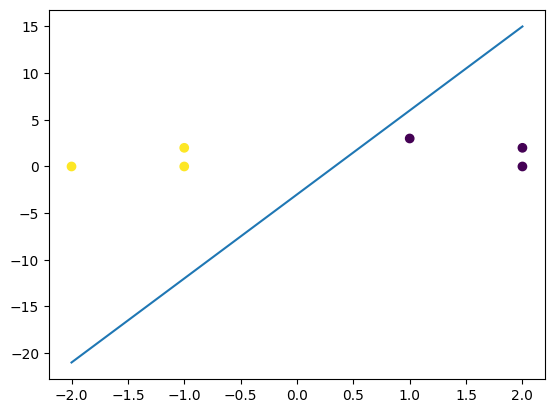

In [26]:

# plot the data

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
# decision boundary

x = np.linspace(-2,2,100)
y = -perceptron.weights[0]/perceptron.weights[1] * x + perceptron.bias/perceptron.weights[1] 
plt.plot(x,y)
plt.show()

Now we generate gaussian features for the gender classification task.
We use the np.normal function to generate samples from a normal distribution with a specific mean and variance.
We use the np.concatenate function to concatenate the two class vectors into a single feature vector.
In order to facilitate the training of the perceptron we shift both features by an additivice constant.
This makes the data easily linearly separable.

In [27]:
# get two similiar random distribution
diff = 20
voice_m = np.random.normal(10, 5, 100)
voice_f = np.random.normal(14+diff, 5, 100)

hair_m = np.random.normal(5, 5, 100)
hair_f = np.random.normal(15+diff, 5, 100)

male_features = np.dstack((voice_m, hair_m))
female_features = np.dstack((voice_f, hair_f))

x_train = np.concatenate([male_features, female_features], axis=1)

print(f"x_train has shape {x_train.shape}")


x_train has shape (1, 200, 2)



We create the label datas. Then we shuffle both the feature and label data to ensure that the training data is not ordered.
Shuffling is done by using the np.random.permutation function which returns a shuffled index vector.
We then apply this index vector to both the feature and label data to shuffle them with the same permutation.

In [28]:
# create labels
label_male = np.array([[1]*100])
label_female = np.array([[-1]*100])
y_train = np.concatenate([label_male, label_female], axis=1)

# shuffle both datasets in the same order
p = np.random.permutation(len(x_train))
x_train = x_train[p][0]
y_train = y_train[p][0]
print(f"x_train has shape {x_train.shape}")
print(f"y_train has shape {y_train.shape}")

x_train has shape (200, 2)
y_train has shape (200,)


Now we train the perceptron on the data. Afterward we plot the data and the decision boundary again.

Epoch: 0, x: [12.35717582  3.402193  ], y: 1
Epoch: 0, x: [4.04512153 1.90003456], y: 1
Epoch: 0, x: [17.16353484  5.78499188], y: 1
Epoch: 0, x: [8.43674052 2.14272324], y: 1
Epoch: 0, x: [ 6.39705633 10.28816592], y: 1
Epoch: 0, x: [14.4358147   1.04255595], y: 1
Epoch: 0, x: [14.29794207  2.37686327], y: 1
Epoch: 0, x: [6.81738248 5.3593902 ], y: 1
Epoch: 0, x: [10.07848186 14.55379714], y: 1
Epoch: 0, x: [-1.21342477  8.93982342], y: 1
Epoch: 0, x: [15.75017862  7.56541072], y: 1
Epoch: 0, x: [14.95973011  2.2679186 ], y: 1
Epoch: 0, x: [14.76662064 10.21972328], y: 1
Epoch: 0, x: [-0.1062741  15.53892576], y: 1
Epoch: 0, x: [ 8.32961317 12.29963741], y: 1
Epoch: 0, x: [10.01059182 10.07702729], y: 1
Epoch: 0, x: [12.02726706  8.745923  ], y: 1
Epoch: 0, x: [11.4454597   1.62239261], y: 1
Epoch: 0, x: [16.60579096  7.20133196], y: 1
Epoch: 0, x: [2.26547223 8.44485928], y: 1
Epoch: 0, x: [8.98676838 3.61676936], y: 1
Epoch: 0, x: [ 6.72015328 14.6226666 ], y: 1
Epoch: 0, x: [10.967

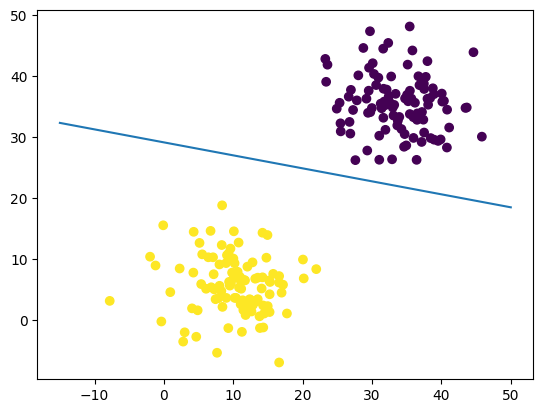

In [29]:
perceptron = SinglePerceptron()

perceptron.train(x_train, y_train, epochs=20)
print(f"final parameters {perceptron}")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
x = np.linspace(-15,50,100)

def decision_boundary(x):
    return -perceptron.weights[0]/perceptron.weights[1] * x + perceptron.bias/perceptron.weights[1]

y = decision_boundary(x)
plt.plot(x,y)
plt.show()